In [ ]:
!wget -nc 140.114.76.206:8000/pA1.csv
!wget -nc 140.114.76.206:8000/pA2.csv

File ‘pA1.csv’ already there; not retrieving.

File ‘pA2.csv’ already there; not retrieving.



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import torch
from torch import nn
from torch.nn import functional as F
from torch.utils.data import Dataset, DataLoader

In [ ]:
seed = 999
torch.manual_seed(seed)
torch.backends.cudnn.deterministic = True

In [ ]:
class Data:
    def __init__(self, csv_path):
        super().__init__()
        self.anns = pd.read_csv(csv_path).to_dict('records')

    def __len__(self):
        return len(self.anns)

    def __getitem__(self, idx):
        ann = self.anns[idx]
        x = torch.tensor(ann['x'])
        y = torch.tensor(ann['y'])
        return x, y


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.a = nn.Parameter(torch.rand(1) * 0.001)
        self.b = nn.Parameter(torch.rand(1) * 0.001)
    
    def forward(self, xs):
        ps = self.a * xs + self.b
        return ps


# Problem A1 and Report

In [ ]:
data = Data('./pA1.csv')
loader = DataLoader(data, batch_size=1, shuffle=True)

device = 'cpu'
model = Net().to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)

history = {
    'loss': [],
    'a': [],
    'b': [],
    'x': [],
    'y': []
}

for epoch in range(100):
  tloss = 0
  for xs,ys in iter(loader):
    xs = xs.to(device)
    ys = ys.to(device)
    
    optimizer.zero_grad()
    ps = model(xs)
    loss = criterion(ps,ys)
    loss.backward()
    optimizer.step()
    tloss += loss.detach().item()
    ##
    history['loss'].append(loss.detach().item())
    history['a'].append(model.a.item())
    history['b'].append(model.b.item())
    if epoch == 0:
      history['x'].append(xs)
      history['y'].append(ys)
  al = tloss/50 #count the average loss of each epoch
  print(f'average loss: {al}')


average loss: 2.8755170345306396
average loss: 0.34984325408935546
average loss: 0.1603431797027588
average loss: 0.18593189239501953
average loss: 0.1525813388824463
average loss: 0.14869274139404298
average loss: 0.17497655868530274
average loss: 0.19349690914154052
average loss: 0.17205965995788575
average loss: 0.2047729969024658
average loss: 0.15755998611450195
average loss: 0.16986532211303712
average loss: 0.1622530746459961
average loss: 0.17272727012634279
average loss: 0.16594101905822753
average loss: 0.1971064567565918
average loss: 0.17956297874450683
average loss: 0.15194106101989746
average loss: 0.1830865478515625
average loss: 0.17349908828735353
average loss: 0.172806453704834
average loss: 0.18402909755706787
average loss: 0.1776180362701416
average loss: 0.15868826866149902
average loss: 0.2102586078643799
average loss: 0.1444789981842041
average loss: 0.19523094177246095
average loss: 0.15939334869384766
average loss: 0.21727246284484864
average loss: 0.1604961681

##Problem A1 Answer

In [ ]:
print(model.a)
print(model.b)

Parameter containing:
tensor([4.9686], requires_grad=True)
Parameter containing:
tensor([3.9597], requires_grad=True)


## Visualize the loss function

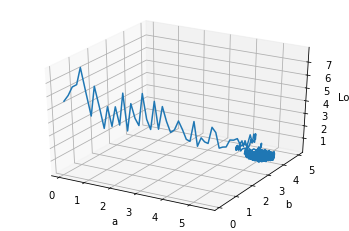

In [ ]:

fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
X = np.asarray(history['a'])
Y = np.asarray(history['b'])
Z = np.asarray(history['loss'])
# Plot the surface.
surf = ax.plot(X, Y, Z)
ax.set_xlabel('a')
ax.set_ylabel('b')
ax.set_zlabel('Loss')


plt.show()


# Problem A2

average loss: 1.571671495437622
average loss: 0.2891588926315308
average loss: 0.1381965970993042
average loss: 0.06696905612945557
average loss: 0.06639603614807128
average loss: 0.04564701080322266
average loss: 0.053747739791870114
average loss: 0.0715661334991455
average loss: 0.05304900646209717
average loss: 0.05017764091491699
average loss: 0.06319936275482178
average loss: 0.05792160034179687
average loss: 0.05566661357879639
average loss: 0.05123688220977783
average loss: 0.04901272296905518
average loss: 0.061237940788269045
average loss: 0.08271233558654785
average loss: 0.0506044340133667
average loss: 0.05701613903045654
average loss: 0.05588059902191162
average loss: 0.055481796264648435
average loss: 0.06271502494812012
average loss: 0.0552371883392334
average loss: 0.06043163299560547
average loss: 0.061322016716003416
average loss: 0.0472633171081543
average loss: 0.05437873363494873
average loss: 0.06170946598052979
average loss: 0.044473557472229
average loss: 0.0803

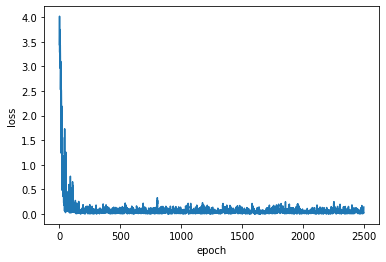

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        #update paraneter
        self.w0 = nn.Parameter(torch.rand(1) * 0.001)
        self.w1 = nn.Parameter(torch.rand(1) * 0.001)
        self.w2 = nn.Parameter(torch.rand(1) * 0.001)

    
    def forward(self, xs):
        ps = self.w0 * pow(xs, 2) + self.w1 * xs + self.w2  
        return ps


#load data
data = Data('./pA2.csv')
loader = DataLoader(data, batch_size=1, shuffle=True)

device = 'cpu'
model = Net().to(device)
criterion = nn.L1Loss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-1)

history = {
    'loss': [],
    'w0': [],
    'w1': [],
    'w2': []
}

for epoch in range(50):
    tloss = 0
    for xs, ys in iter(loader):
        xs = xs.to(device)
        ys = ys.to(device)

        optimizer.zero_grad()
        ps = model(xs)
        loss = criterion(ps, ys)
        loss.backward()
        optimizer.step()
        
        tloss += loss.detach().item()
        history['loss'].append(loss.detach().item())
        history['w0'].append(model.w0.item())
        history['w1'].append(model.w1.item())
        history['w2'].append(model.w2.item())
    al = tloss/50
    print(f'average loss: {al}')

w0 = model.w0
w1 = model.w1
w2 = model.w2
print(f'wo:{w0}')
print(f'w1:{w1}')
print(f'w2:{w2}')

#visualize the loss

plt.plot(np.asarray(history['loss']))
plt.ylabel('loss')
plt.xlabel('epoch')

plt.show()
